In [14]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [15]:
stardf = pd.read_csv("TG_stars.csv")
stardf.head (7)

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,9.10,3.54,1.39,0.482,16.845016,3
1,9.27,21.90,3.10,0.999,20.972221,5
2,6.61,2.81,0.63,-0.019,13.853532,1
3,8.06,7.75,0.97,0.370,17.506509,3
4,8.55,2.87,1.11,0.902,15.839409,4
5,12.31,18.80,4.99,1.336,23.680789,6
6,9.64,17.74,1.30,0.740,20.884768,4


In [16]:
stars_df_features = stardf.copy()

stars_df_features['Amag_SQ'] = stars_df_features['Amag']**2
stars_df_features['Vmag_SQ'] = stars_df_features['Vmag']**2
stars_df_features['B-V_SQ'] = stars_df_features['B-V']**2
stars_df_features['Sum_AV'] = stars_df_features['Amag'] + stars_df_features['Vmag']
stars_df_features['Sub_AV'] = stars_df_features['Amag'] + stars_df_features['Vmag']

stars_df_features.head()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,Amag_SQ,Vmag_SQ,B-V_SQ,Sum_AV,Sub_AV
0,9.10,3.54,1.39,0.482,16.845016,3,283.754574,82.8100,0.232324,25.945016,25.945016
1,9.27,21.90,3.10,0.999,20.972221,5,439.834036,85.9329,0.998001,30.242221,30.242221
2,6.61,2.81,0.63,-0.019,13.853532,1,191.920338,43.6921,0.000361,20.463532,20.463532
3,8.06,7.75,0.97,0.370,17.506509,3,306.477840,64.9636,0.136900,25.566509,25.566509
4,8.55,2.87,1.11,0.902,15.839409,4,250.886893,73.1025,0.813604,24.389409,24.389409


In [17]:
stars_df_features.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9677 entries, 0 to 9676
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         9677 non-null   float64
 1   Plx          9677 non-null   float64
 2   e_Plx        9677 non-null   float64
 3   B-V          9677 non-null   float64
 4   Amag         9677 non-null   float64
 5   TargetClass  9677 non-null   int64  
 6   Amag_SQ      9677 non-null   float64
 7   Vmag_SQ      9677 non-null   float64
 8   B-V_SQ       9677 non-null   float64
 9   Sum_AV       9677 non-null   float64
 10  Sub_AV       9677 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 831.7 KB


In [18]:
X = stars_df_features.drop('TargetClass', axis=1, inplace=False)
Y = stars_df_features['TargetClass']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=21, stratify=Y)

In [19]:
n_neigh = 15
K_best = 0
Score_best = 0

for i in range(1,n_neigh):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,Y_train)
    Y_pred = KNN.predict(X_test)
    if KNN.score(X_test,Y_test) > Score_best:
        Score_best = KNN.score(X_test,Y_test)
        K_best = i
print("neighbors is {} with a test accuracy of {}%""".format(K_best, (Score_best*100)))

neighbors is 10 with a test accuracy of 52.01446280991735%


In [20]:
Y_test.value_counts()

5    547
3    491
4    436
2    257
1    112
6     87
7      4
0      2
Name: TargetClass, dtype: int64

In [21]:
Y_train.value_counts()

5    2186
3    1966
4    1742
2    1028
1     447
6     346
7      18
0       8
Name: TargetClass, dtype: int64

In [27]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

In [28]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)
Y_pred = KNN.predict(X_test)
print("Precision Score : ",precision_score(Y_test, Y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(Y_test, Y_pred, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.5175619834710744
Recall Score :  0.5175619834710744


C:\Users\Helen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [29]:
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

print(f"LR Training Data: {classifier.score(X_train, Y_train)}")
print(f"LR Testing Data: {classifier.score(X_test, Y_test)}")

LR Training Data: 0.5083322568143651
LR Testing Data: 0.5051652892561983


C:\Users\Helen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf =RandomForestClassifier( random_state = 21).fit(X_train_scaled, Y_train)

y_pred=clf.predict(X_test_scaled)

print(f'RFC Training Data : {clf.score(X_train_scaled,Y_train)}')
print(f'RFC Testing Data: {clf.score(X_test_scaled,Y_test)}')

RFC Training Data : 0.9997416354476166
RFC Testing Data: 0.7510330578512396


In [31]:
from sklearn.datasets import make_blobs

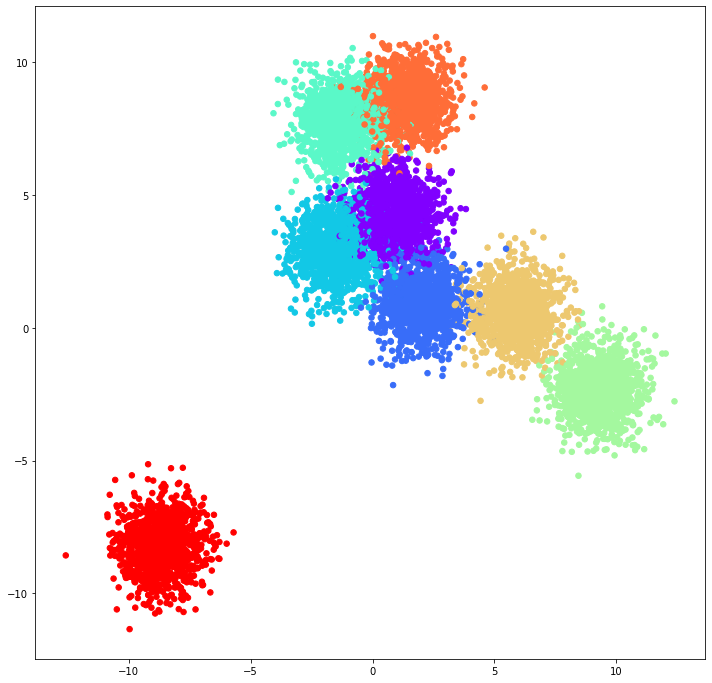

In [32]:
fig,axes=plt.subplots (figsize=(12, 12))
X, Y = make_blobs(n_samples= 9677 , centers=8, random_state=0, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap="rainbow");


plt.show()